# 1. Financial EDA - Kiet Nguyen

### Steps

Code to pull data is as below, we used a mixed of **yfinace** data and **fred** data. 7 indicators

Each dataset has a different update schedule, for example, **sp500** is updated daily, while **gdp growth rate** is updated quarterly. *Here is the list:*
- sp500: daily 
- interest_rates: daily 
- inflation_rates: monthly 
- gdp_growth_rates: quarterly 
- unemployment_rates: monthly 
- consumer_sentiment: monthly 
- vix: daily

*Cleaning steps:*
- Rename each indicator's column name
- Fill na values with **ffill** method
- For quarterly and monthly indicators, the data change will not be abrupt. For example, data in Jan 1 will not be significantly different from Jan 15. Therefore, in order to expand the time series data, we will fill rows, for example, Jan 2 to Jan 31, with data on Jan 1. This is filled by using **ffill** method.
- We merge data using **interest_rates** df as base df, since it has the most rows.
- Finally, fill na with **ffill** and **bfill** using the same logic. Or else, just drop it

### Code to pull financial data

# DO NOT RUN
import yfinance as yf
import pandas_datareader.data as web
import datetime

sp500_data = yf.download("SPY", start="1977-01-01", end="2024-08-19")
vix_data = yf.download("^VIX", start="1977-01-01", end="2024-08-19")

# Define date range
start_date = datetime.datetime(1977, 1, 1)
end_date = datetime.datetime(2024, 8, 19)

# Interest Rates (10-Year Treasury)
interest_rates = web.DataReader('DGS10', 'fred', start_date, end_date)

# Inflation Rates (CPI)
inflation_rates = web.DataReader('CPIAUCSL', 'fred', start_date, end_date)

# GDP Growth Rates
gdp_growth_rates = web.DataReader('A191RL1Q225SBEA', 'fred', start_date, end_date)

# Unemployment Rate
employment_data = web.DataReader('UNRATE', 'fred', start_date, end_date)

# Consumer Sentiment Index
consumer_sentiment = web.DataReader('UMCSENT', 'fred', start_date, end_date)

# Save data to CSV
sp500_data.to_csv("sp500_data.csv")
interest_rates.to_csv("interest_rates.csv")
inflation_rates.to_csv("inflation_rates.csv")
gdp_growth_rates.to_csv("gdp_growth_rates.csv")
employment_data.to_csv("employment_data.csv")
consumer_sentiment.to_csv("consumer_sentiment.csv")
vix_data.to_csv("vix_data.csv")

## 1.1 Data Preprocessing

In [1]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Create DataFrame
sp500 = pd.read_csv('sp500_data.csv')
interest_rates = pd.read_csv('interest_rates.csv')
inflation_rates = pd.read_csv('inflation_rates.csv')
gdp_growth_rates = pd.read_csv('gdp_growth_rates.csv')
unemployment_rates = pd.read_csv('employment_data.csv')
consumer_sentiment = pd.read_csv('consumer_sentiment.csv')
vix = pd.read_csv('vix_data.csv')

### 1.1.1 Understanding the datasets:

- **sp500**: contains historical data on the S&P 500 index, which tracks the performance of 500 of the largest publicly traded companies in the U.S. stock market. It includes fields such as date, opening price, closing price, daily highs and lows, and trading volume.

- **interest_rates (DGS10)**: Represents the 10-Year Treasury Constant Maturity Rate, a crucial indicator of long-term interest rates and market sentiment on future economic conditions.

- **inflation_rates (CPIAUCSL):** tracks the Consumer Price Index for All Urban Consumers, representing the overall change in prices of goods and services in urban areas, providing a measure of inflation.

- **gdp_growth_rates (A191RL1Q225SBEA)**: represents the quarterly percentage change in Real GDP, adjusted for inflation and seasonality, which tracks the overall growth or contraction of the U.S. economy.

- **unemployment_rates (UNRATE)**: tracks the U.S. unemployment rate, measuring the percentage of the labor force that is jobless and actively seeking work, providing insight into the health of the labor market.

- **consumer_sentiment (UMCSENT)**: tracks consumer confidence and optimism about economic conditions, providing insight into future consumer spending and economic behavior. High consumer sentiment often correlates with higher spending, while low sentiment may indicate economic pessimism.

- **vix**: Known as the "fear gauge," it tracks the Volatility Index (VIX), which measures market expectations of volatility over the next 30 days. Higher VIX values indicate increased uncertainty or market fear, while lower values suggest stability.

### 1.1.2 Renaming columns

In [3]:
# Interest Rates is a daily-updated indicator
interest_rates = interest_rates.rename(columns = {'DATE' : 'Date','DGS10':'Interest Rate'})
# Smoothing the first data point, since it is null
interest_rates.loc[0, 'Interest Rate'] = interest_rates.loc[1, 'Interest Rate']

In [4]:
# sp500 price is updated daily
sp500.columns = ['Date']+['sp500_' + str(col) for col in sp500.columns if col != 'Date']
sp500.describe

<bound method NDFrame.describe of             Date  sp500_Open  sp500_High   sp500_Low  sp500_Close  \
0     1993-02-01   43.968750   44.250000   43.968750    44.250000   
1     1993-02-02   44.218750   44.375000   44.125000    44.343750   
2     1993-02-03   44.406250   44.843750   44.375000    44.812500   
3     1993-02-04   44.968750   45.093750   44.468750    45.000000   
4     1993-02-05   44.968750   45.062500   44.718750    44.968750   
...          ...         ...         ...         ...          ...   
7938  2024-08-12  534.210022  535.729980  530.950012   533.270020   
7939  2024-08-13  536.530029  542.280029  536.280029   542.039978   
7940  2024-08-14  542.849976  544.960022  540.119995   543.750000   
7941  2024-08-15  549.500000  553.359985  548.880005   553.070007   
7942  2024-08-16  551.419983  555.020020  551.260010   554.309998   

      sp500_Adj Close  sp500_Volume  
0           24.783648        480500  
1           24.836170        201300  
2           25.098707  

In [5]:
# Infation Rate is updated monthly
inflation_rates = inflation_rates.rename(columns = {'DATE' : 'Date','CPIAUCSL':'Inflation Index'})
inflation_rates

,Date,Inflation Index
0,1993-02-01,143.100
1,1993-03-01,143.300
2,1993-04-01,143.800
3,1993-05-01,144.200
4,1993-06-01,144.300
...,...,...
374,2024-04-01,313.207
375,2024-05-01,313.225
376,2024-06-01,313.049
377,2024-07-01,313.534


In [6]:
# GDP growth rate is updated quarterly
gdp_growth_rates = gdp_growth_rates.rename(columns = {'DATE' : 'Date','A191RL1Q225SBEA':'GDP Growth Rate'})
gdp_growth_rates

,Date,GDP Growth Rate
0,1993-04-01,2.3
1,1993-07-01,1.9
2,1993-10-01,5.6
3,1994-01-01,3.9
4,1994-04-01,5.5
...,...,...
120,2023-04-01,2.4
121,2023-07-01,4.4
122,2023-10-01,3.2
123,2024-01-01,1.6


In [7]:
# Employment Rate is updated Monthly
unemployment_rates = unemployment_rates.rename(columns = {'DATE' : 'Date','UNRATE':'Unemployment Rate'})
unemployment_rates

,Date,Unemployment Rate
0,1993-02-01,7.1
1,1993-03-01,7.0
2,1993-04-01,7.1
3,1993-05-01,7.1
4,1993-06-01,7.0
...,...,...
374,2024-04-01,3.9
375,2024-05-01,4.0
376,2024-06-01,4.1
377,2024-07-01,4.3


In [8]:
# Consumer Sentiment is updated monthly
consumer_sentiment = consumer_sentiment.rename(columns = {'DATE' : 'Date','UMCSENT':'Consumer Sentiment'})
consumer_sentiment

,Date,Consumer Sentiment
0,1993-02-01,86.6
1,1993-03-01,85.9
2,1993-04-01,85.6
3,1993-05-01,80.3
4,1993-06-01,81.5
...,...,...
374,2024-04-01,77.2
375,2024-05-01,69.1
376,2024-06-01,68.2
377,2024-07-01,66.4


In [9]:
# Volatility Index is calculated daily
vix.columns = ['Date']+['VIX ' + str(col) for col in vix.columns if col != 'Date']
vix

,Date,VIX Open,VIX High,VIX Low,VIX Close,VIX Adj Close,VIX Volume
0,1993-02-01,12.510000,12.920000,12.180000,12.330000,12.330000,0
1,1993-02-02,12.470000,12.890000,12.220000,12.250000,12.250000,0
2,1993-02-03,11.980000,12.340000,11.790000,12.120000,12.120000,0
3,1993-02-04,11.860000,12.840000,11.690000,12.290000,12.290000,0
4,1993-02-05,12.560000,13.450000,12.490000,12.900000,12.900000,0
...,...,...,...,...,...,...,...
7938,2024-08-12,20.790001,21.190001,18.889999,20.709999,20.709999,0
7939,2024-08-13,20.059999,20.790001,17.950001,18.120001,18.120001,0
7940,2024-08-14,18.410000,18.490000,16.120001,16.190001,16.190001,0
7941,2024-08-15,16.270000,16.680000,14.770000,15.230000,15.230000,0


### 1.1.3 Handling Null Records

In [10]:
# Define a function to handle date column
def time_series_data_handler(df):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True) 

    # Resample to daily frequency and forward fill missing data
    return df.resample('D').ffill()

#### Interest Rates

In [11]:
interest_rates.isna().sum()

Date               0
Interest Rate    336
dtype: int64

In [12]:
# Fill na with previous date data
interest_rates.fillna(method='ffill', inplace=True)

# Check if there are any remaining NaN values
interest_rates.isna().sum()

Date             0
Interest Rate    0
dtype: int64

In [13]:
interest_rates_graph = interest_rates

In [14]:
interest_rates = time_series_data_handler(interest_rates)
interest_rates.shape

(11523, 1)

#### SP500

In [15]:
sp500.isna().sum()
sp500_graph = sp500

In [16]:
sp500 = time_series_data_handler(sp500)
sp500.shape

(11520, 6)

#### Inflation Rates

In [17]:
inflation_rates.isna().sum()
inflation_rates_graph = inflation_rates

In [18]:
inflation_rates = time_series_data_handler(inflation_rates)
inflation_rates.shape

(11505, 1)

#### GDP Growth Rates

In [19]:
gdp_growth_rates.isna().sum()
gdp_growth_rates_graph = gdp_growth_rates

In [20]:
gdp_growth_rates = time_series_data_handler(gdp_growth_rates)
gdp_growth_rates.shape

(11324, 1)

#### Employment Rates

In [21]:
unemployment_rates.isna().sum()
unemployment_rates_graph = unemployment_rates

In [22]:
unemployment_rates = time_series_data_handler(unemployment_rates)
unemployment_rates.shape

(11505, 1)

#### Consumer Sentiment

In [23]:
consumer_sentiment.isna().sum()
consumer_sentiment_graph = consumer_sentiment

In [24]:
consumer_sentiment = time_series_data_handler(consumer_sentiment)
consumer_sentiment.shape

(11505, 1)

#### Volatility Index (VIX)

In [25]:
vix.columns.isna().sum()
vix_graph = vix

In [26]:
vix = time_series_data_handler(vix)
vix.shape

(11520, 6)

## 1.2 Merge df for analysis and ML model

In [27]:
df = interest_rates.merge(gdp_growth_rates, on = 'Date', how = 'left')
df = df.merge(sp500, on = 'Date', how = 'left')
df = df.merge(inflation_rates, on = 'Date', how = 'left')
df = df.merge(unemployment_rates, on = 'Date', how = 'left')
df = df.merge(consumer_sentiment, on = 'Date', how = 'left')
df = df.merge(vix, on = 'Date', how = 'left')

# Final df, should have 17 columns
df.describe

<bound method NDFrame.describe of             Interest Rate  GDP Growth Rate  sp500_Open  sp500_High  \
Date                                                                 
1993-02-01           6.46              NaN   43.968750   44.250000   
1993-02-02           6.46              NaN   44.218750   44.375000   
1993-02-03           6.45              NaN   44.406250   44.843750   
1993-02-04           6.39              NaN   44.968750   45.093750   
1993-02-05           6.32              NaN   44.968750   45.062500   
...                   ...              ...         ...         ...   
2024-08-15           3.92              NaN  549.500000  553.359985   
2024-08-16           3.89              NaN  551.419983  555.020020   
2024-08-17           3.89              NaN         NaN         NaN   
2024-08-18           3.89              NaN         NaN         NaN   
2024-08-19           3.86              NaN         NaN         NaN   

             sp500_Low  sp500_Close  sp500_Adj Close  s

In [28]:
# Return data from 1999-01-04 to 2024-04-01
# df = df.dropna()

# Do ffill and bfill to retain data from 1999-01-01 to 2024-08-19
df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')
print("Null values: ")
print(df.isna().sum())
df.shape

Null values: 
Interest Rate         0
GDP Growth Rate       0
sp500_Open            0
sp500_High            0
sp500_Low             0
sp500_Close           0
sp500_Adj Close       0
sp500_Volume          0
Inflation Index       0
Unemployment Rate     0
Consumer Sentiment    0
VIX Open              0
VIX High              0
VIX Low               0
VIX Close             0
VIX Adj Close         0
VIX Volume            0
dtype: int64


(11523, 17)

## 1.3 EDA

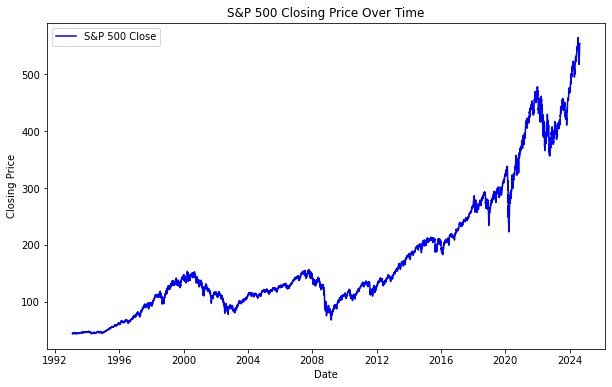

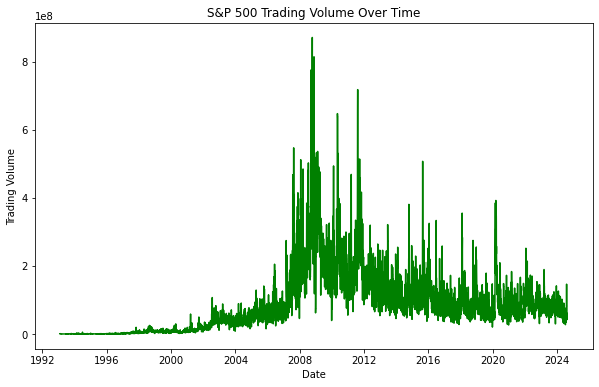

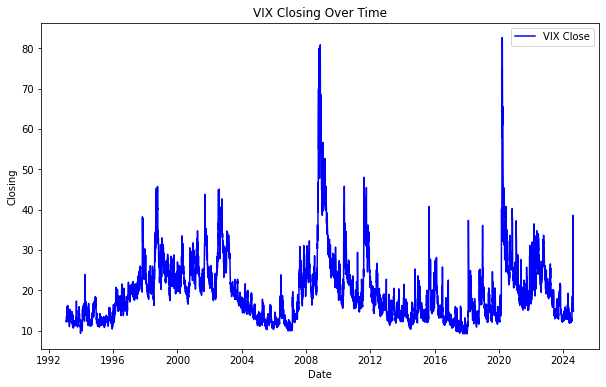

In [29]:
# Line chart for Closing Price
plt.figure(figsize=(10,6))
plt.plot(df.index, df['sp500_Close'], label='S&P 500 Close', color='b')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Over Time')
plt.legend()
plt.show()

# Volume Bar Chart
plt.figure(figsize=(10,6))
plt.plot(df.index, df['sp500_Volume'], color='g')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('S&P 500 Trading Volume Over Time')
plt.show()

# Line chart for Votality
plt.figure(figsize=(10,6))
plt.plot(df.index, df['VIX Close'], label='VIX Close', color='b')
plt.xlabel('Date')
plt.ylabel('Closing')
plt.title('VIX Closing Over Time')
plt.legend()
plt.show()

In the "S&P 500 Closing Price" graph, we can see that the price almost gradually increases over year, execept in some periods. In the 2008, the closing price goes down for almost 50% indicating the demand for this stocks got lower. Or in the beginning 2020, we can observe the same trend, even though not as dramatic. If comparing this with the "VIX Closing Over Time" graph, the VIX is quite high in these periods, indicating how unsure of investor against the market.
If we have a look at the "S&P 500 Trading Volume" graph, it is quite interesting that at intervals where S&P 500 closing price dips, the trading fluctuate a lot

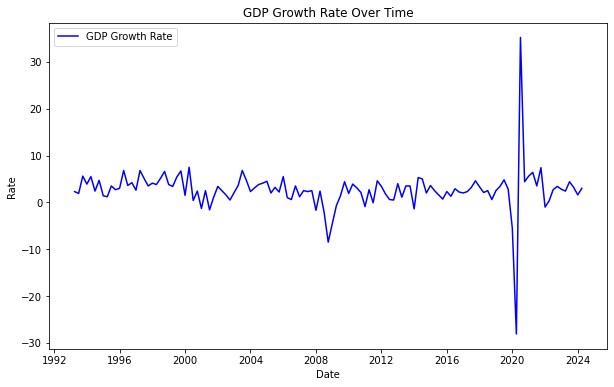

In [30]:
# Line chart for GDP Growth Rate
plt.figure(figsize=(10,6))
plt.plot(gdp_growth_rates_graph.index, gdp_growth_rates_graph['GDP Growth Rate'], label='GDP Growth Rate', color='b')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('GDP Growth Rate Over Time')
plt.legend()
plt.show()

In the "GDP Growth Rate Over Time" graph, first thing we can see is the GDP growth rate dip very low in 2020 then bounce up in 2021. This is the COVID period, and the recovery pattern seems to happen really fast. This is exaplained as the drop in Omicron case, and businesses start to operate after the lock down. Comparing to the recover pattern of 2008, which takes more than 2 years to come back to normal, the 2021 recovery was definitely rapid.
However,it seems like the rate is not quite reflective of what the US Commerce Department announce, so we will need to look into the number.

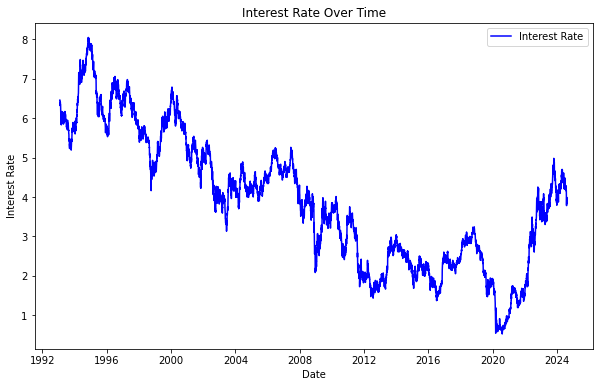

In [31]:
# Line chart for Interest Rate
plt.figure(figsize=(10,6))
plt.plot(interest_rates_graph.index, interest_rates_graph['Interest Rate'], label='Interest Rate', color='b')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Over Time')
plt.legend()
plt.show()

It seems like lowering the interest rate to promote the economy was practiced quite often in 2008 period and COVID period.

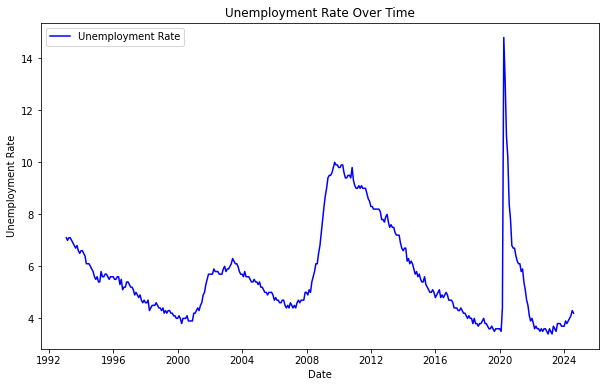

In [32]:
# Line chart for Unemployment Rate
plt.figure(figsize=(10,6))
plt.plot(unemployment_rates_graph.index, unemployment_rates_graph['Unemployment Rate'], label='Unemployment Rate', color='b')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.show()

The unemployemnt rate was generally maintained under 6%, while we can see during the 2008 depression, it peaks over 10%, and in the COVID period, over 14%. This data seems quite reflective on the economy.

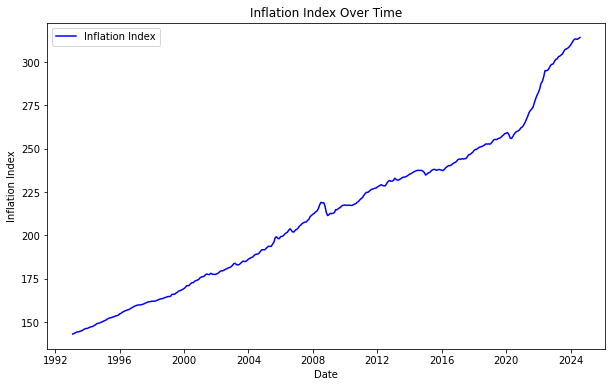

In [33]:
# Line chart for Inflation Index
plt.figure(figsize=(10,6))
plt.plot(inflation_rates_graph.index, inflation_rates_graph['Inflation Index'], label='Inflation Index', color='b')
plt.xlabel('Date')
plt.ylabel('Inflation Index')
plt.title('Inflation Index Over Time')
plt.legend()
plt.show()

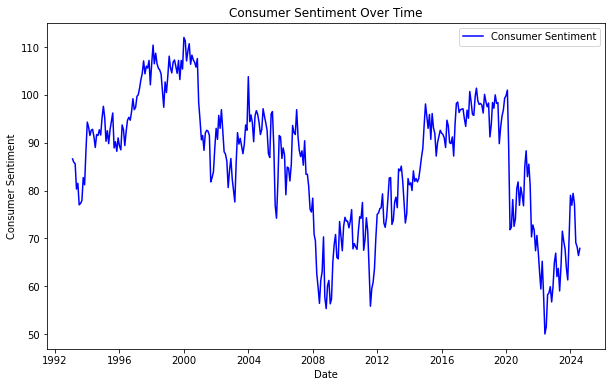

In [34]:
# Line chart for Consumer Sentiment
plt.figure(figsize=(10,6))
plt.plot(consumer_sentiment_graph.index, consumer_sentiment_graph['Consumer Sentiment'], label='Consumer Sentiment', color='b')
plt.xlabel('Date')
plt.ylabel('Consumer Sentiment')
plt.title('Consumer Sentiment Over Time')
plt.legend()
plt.show()

It is interesting to see that the consumer sentiment is highest in the 2000s. After the 2008 depression, it seems like consumer had much less consuming activities for several years. Same pattern during the COVID, which is understandable as unemployment rate in these periods was relatively high.

# 2. Building model

We define the recession periods as follows:

- March 2001 to November 2001
- Dec 2007 to June 2009
- Jan 2020 to June 2020

(Source: https://www.nber.org/research/business-cycle-dating)

In order to create a classification model, we will flag these period as 1, and 0 otherwise. This will be stored in a column caled **recession**

In [29]:
df['recession'] = 0

df.loc['03-01-2001':'11-30-2001', 'recession'] = 1
df.loc['12-01-2007':'06-30-2009', 'recession'] = 1
df.loc['01-01-2020':'06-30-2020', 'recession'] = 1

In [30]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, average_precision_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

## 2.1 Data preparation before training

### Creating Fuctions

In [31]:
def plot_pr_curve(y_test, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

In [32]:
# Define a function that take a model and timeframe to apply the training process
def training_process(model,X, y, start_index, stop_index):
    num_split = len(start_index)
    
    for i in range(num_split - 1):
        print(f'Train: {i+1}')
        X_train, X_test = X.loc[start_index[0]:stop_index[i], :], X.loc[start_index[i+1]:stop_index[i+1], :]
        y_train, y_test = y.loc[start_index[0]:stop_index[i]], y.loc[start_index[i+1]:stop_index[i+1]]

        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        print("PR-AUC:", average_precision_score(y_test, y_pred_proba))
        print(classification_report(y_test, y_pred, zero_division=0))

    plot_pr_curve(y_test, y_pred_proba)
    return model

In [33]:
# LSTM model
def create_lstm_model(input_shape, optimizer):
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, input_shape = input_shape))
    lstm_model.add(Dense(1,activation = "sigmoid")) # Binary Classification
    
    lstm_model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy','mse'])
    
    return lstm_model

def training_lstm_model(X, y, optimizer, class_weight = {0:1, 1:1}, n_splits=5, batch_size=32, epochs=10):
    tss = TimeSeriesSplit(n_splits=n_splits)
    
    # Intitiating LSTM model
    input_shape = (1,X.shape[1]) # Timestamp 1, X feature
    lstm_model = create_lstm_model(input_shape, optimizer)
    
    for i, (train_index, test_index) in enumerate(tss.split(X)):
        print(f"Train {i+1}: ")
        print(train_index)
        print(test_index)
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Reshape to fit in the lstm layer
        X_train_lstm = np.expand_dims(X_train, axis = 1)
        X_test_lstm = np.expand_dims(X_test, axis = 1)
    
        # Fit the model
        lstm_model.fit(X_train_lstm, y_train, class_weight = class_weight, batch_size=batch_size, epochs=epochs, verbose=0)
        
        y_pred_proba = lstm_model.predict(X_test_lstm)
        y_pred = (y_pred_proba > 0.7).astype(int) # Threshold of 0.7
        
        if len(set(y_test)) < 2: 
            continue
        print("PR-AUC:", average_precision_score(y_test, y_pred_proba))
        print(classification_report(y_test, y_pred, zero_division=0))
        
    plot_pr_curve(y_test, y_pred_proba)
    return lstm_model


### Prepping data

In [34]:
# We will use the first 2 recession as train data and the last one as test data
y = df['recession']
X = df.drop(columns=['recession', 'VIX Volume'])

In [35]:
# Normalize the data
scaler = StandardScaler().set_output(transform = "pandas") # Keep the output as pandas dataframe
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

In [36]:
# We proceed to split the data into 3 intervals that capture 3 recession
start_index = [pd.to_datetime('1993-02-01'), pd.to_datetime('2005-01-02'), pd.to_datetime('2012-01-02')]
stop_index = [pd.to_datetime('2005-01-01'), pd.to_datetime('2012-01-01'), pd.to_datetime('2024-08-19')]


### 2.1.1 Logistic Regression

Train: 1
PR-AUC: 0.4565456025312473
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1978
           1       0.37      0.42      0.39       578

    accuracy                           0.71      2556
   macro avg       0.60      0.60      0.60      2556
weighted avg       0.72      0.71      0.71      2556

Train: 2
PR-AUC: 0.5536125155662909
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      4432
           1       0.10      0.65      0.17       182

    accuracy                           0.74      4614
   macro avg       0.54      0.70      0.51      4614
weighted avg       0.95      0.74      0.82      4614



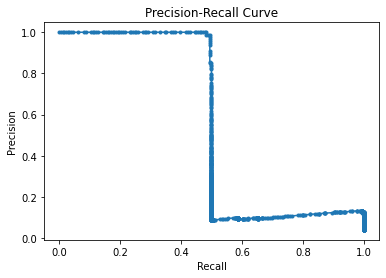

In [43]:
# Logistic Regression Model
lgr_model = training_process(LogisticRegression(), X_scaled, y, start_index, stop_index)

### 2.1.2 Random Forest Classifier

Train: 1
PR-AUC: 0.6793931673903731
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1978
           1       0.45      0.74      0.56       578

    accuracy                           0.74      2556
   macro avg       0.68      0.74      0.69      2556
weighted avg       0.80      0.74      0.76      2556

Train: 2
PR-AUC: 0.16757896100354513
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      4432
           1       0.14      0.53      0.22       182

    accuracy                           0.85      4614
   macro avg       0.56      0.70      0.57      4614
weighted avg       0.95      0.85      0.89      4614



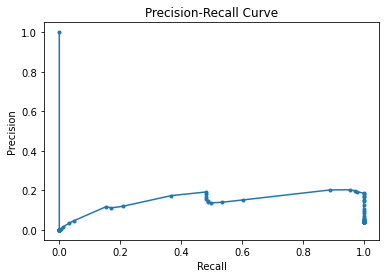

In [44]:
# Random Forest Classifier model
rfc_model = training_process(RandomForestClassifier(), X_scaled, y, start_index, stop_index)

### 2.1.3 Gradient Boosting Classifier

Train: 1
PR-AUC: 0.5255593985930436
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1978
           1       0.59      0.25      0.35       578

    accuracy                           0.79      2556
   macro avg       0.70      0.60      0.61      2556
weighted avg       0.76      0.79      0.76      2556

Train: 2
PR-AUC: 0.06177334217665935
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      4432
           1       0.04      0.17      0.06       182

    accuracy                           0.79      4614
   macro avg       0.50      0.49      0.47      4614
weighted avg       0.92      0.79      0.85      4614



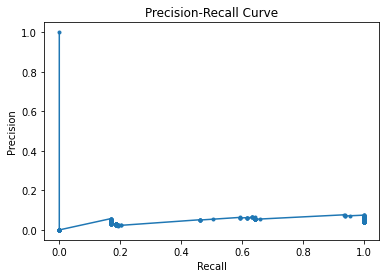

In [45]:
# Gradient Boosting Clasifier
gbc_model = GradientBoostingClassifier()
gbc_model = training_process(gbc_model, X_scaled, y, start_index, stop_index)

### 2.1.4 LSTM

Train 1: 
[   0    1    2 ... 1644 1645 1646]
[1647 1648 1649 ... 3290 3291 3292]
PR-AUC: 0.4739823681134661
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1371
           1       0.59      0.17      0.27       275

    accuracy                           0.84      1646
   macro avg       0.72      0.57      0.59      1646
weighted avg       0.81      0.84      0.80      1646

Train 2: 
[   0    1    2 ... 3290 3291 3292]
[3293 3294 3295 ... 4936 4937 4938]
Train 3: 
[   0    1    2 ... 4936 4937 4938]
[4939 4940 4941 ... 6582 6583 6584]
PR-AUC: 0.653146814425394
              precision    recall  f1-score   support

           0       0.69      0.97      0.80      1068
           1       0.74      0.18      0.29       578

    accuracy                           0.69      1646
   macro avg       0.72      0.57      0.55      1646
weighted avg       0.71      0.69      0.62      1646

Train 4: 
[   0    1    2 ... 6582 6583 6584]
[

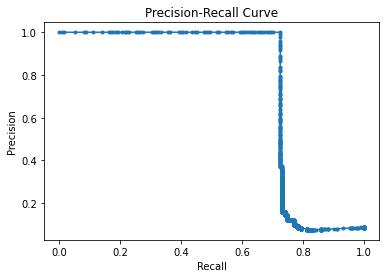

In [46]:
lstm_model = training_lstm_model(X_scaled, y, n_splits = 6)

## 2.2 Apply lagging/rolling

## 2.3 Apply weight for each class

### 2.3.1 Logistic Regression

Train: 1
PR-AUC: 0.4772657083367714
              precision    recall  f1-score   support

           0       0.81      0.61      0.69      1978
           1       0.28      0.53      0.37       578

    accuracy                           0.59      2556
   macro avg       0.55      0.57      0.53      2556
weighted avg       0.69      0.59      0.62      2556

Train: 2
PR-AUC: 0.5497607535746841
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      4432
           1       0.09      0.65      0.16       182

    accuracy                           0.73      4614
   macro avg       0.54      0.69      0.50      4614
weighted avg       0.95      0.73      0.82      4614



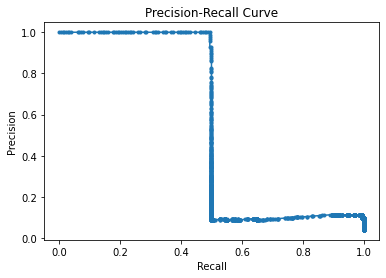

In [47]:
lgr_model_3 = training_process(LogisticRegression(class_weight={0: 2, 1: 17}, max_iter = 200),
                             X_scaled, y, start_index, stop_index)

### 2.3.2 Random Forest Classifier

Train: 1
PR-AUC: 0.3529378228624207
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1978
           1       0.20      0.04      0.06       578

    accuracy                           0.75      2556
   macro avg       0.49      0.50      0.46      2556
weighted avg       0.64      0.75      0.68      2556

Train: 2
PR-AUC: 0.13190446054113952
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4432
           1       0.14      0.17      0.15       182

    accuracy                           0.93      4614
   macro avg       0.55      0.56      0.56      4614
weighted avg       0.93      0.93      0.93      4614



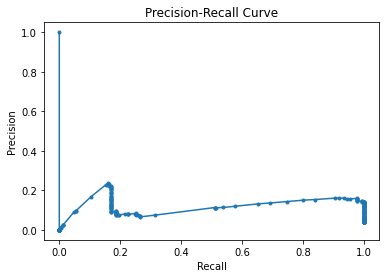

In [48]:
# Random Forest Classifier model
# Wow RFC is really good at handling imbalanced class
rfc_model_3 = training_process(RandomForestClassifier(n_estimators = 600, class_weight={0: 1, 1: 2}), 
                               X_scaled, y, start_index, stop_index)

### 2.3.3 Gradient Boosting Classifier

Train: 1
PR-AUC: 0.22613458528951486
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1978
           1       0.00      0.00      0.00       578

    accuracy                           0.77      2556
   macro avg       0.39      0.50      0.44      2556
weighted avg       0.60      0.77      0.68      2556

Train: 2
PR-AUC: 0.06867924528301887
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4432
           1       0.00      0.00      0.00       182

    accuracy                           0.92      4614
   macro avg       0.48      0.48      0.48      4614
weighted avg       0.92      0.92      0.92      4614



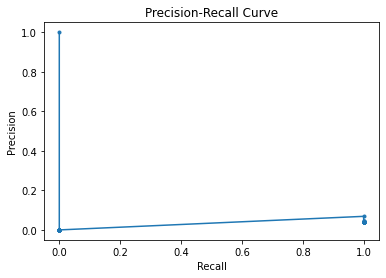

In [49]:
# Create the Gradient Boosting Classifier without class_weight
gbc_model_3 = HistGradientBoostingClassifier(learning_rate=0.001, 
                                             max_iter=1000, 
                                             max_depth=5,
                                             min_samples_leaf=20,
                                             class_weight={0:1, 1:9})
gbc_model_3 = training_process(gbc_model_3, X_scaled, y, start_index, stop_index)

### 2.3.4 LSTM

Train 1: 
[   0    1    2 ... 2304 2305 2306]
[2307 2308 2309 ... 4608 4609 4610]
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step
PR-AUC: 0.11860976935847342
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2029
           1       0.00      0.00      0.00       275

    accuracy                           0.88      2304
   macro avg       0.44      0.50      0.47      2304
weighted avg       0.78      0.88      0.82      2304

Train 2: 
[   0    1    2 ... 4608 4609 4610]
[4611 4612 4613 ... 6912 6913 6914]
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step
PR-AUC: 0.5917029827362035
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1726
           1       0.78      0.37      0.50       578

    accuracy                           0.82      2304
   macro avg       0.80      0.67      0.69      2304
weighted avg       0.81      0.82      0.79      2304

Train 3: 
[   0    1    2 ... 6912 6913 6914]

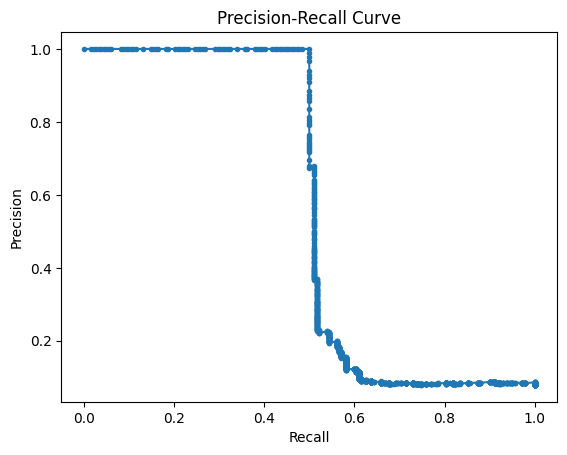

In [38]:
lstm_model = training_lstm_model(X_scaled, y, RMSprop(), class_weight = {0:1, 1:2}, n_splits = 4)

## 2.4 Feature Engineering

In [42]:
X_scaled_featured = X_scaled.copy()  # Copy X_scaled to avoid modifying the original data
X_scaled_featured['sp500_Diff'] = X_scaled_featured['sp500_High'] - X_scaled_featured['sp500_Close']
X_scaled_featured['VIX Diff'] = X_scaled_featured['VIX High'] - X_scaled_featured['VIX Close']

# Dropping unnecessary columns
X_scaled_featured = X_scaled_featured.drop(columns=[
    'sp500_Open', 'sp500_High', 'sp500_Close', 'sp500_Low', 
    'VIX High', 'VIX Close', 'VIX Low', 'VIX Open'
])

### 2.4.1 Logistic Regression

Train: 1
PR-AUC: 0.3577460537450098
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1978
           1       0.35      0.33      0.34       578

    accuracy                           0.71      2556
   macro avg       0.58      0.58      0.58      2556
weighted avg       0.70      0.71      0.71      2556

Train: 2
PR-AUC: 0.5600582519628418
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      4432
           1       0.14      1.00      0.24       182

    accuracy                           0.76      4614
   macro avg       0.57      0.87      0.55      4614
weighted avg       0.97      0.76      0.83      4614



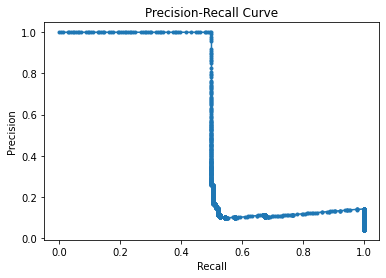

In [52]:
# Logistic Regression Model
lgr_model_4 = training_process(LogisticRegression(), X_scaled_featured, y, start_index, stop_index)

### 2.4.2 Random Forest Classifier

Train: 1
PR-AUC: 0.6574777425127942
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1978
           1       0.70      0.72      0.71       578

    accuracy                           0.87      2556
   macro avg       0.81      0.82      0.81      2556
weighted avg       0.87      0.87      0.87      2556

Train: 2
PR-AUC: 0.770857324799391
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4432
           1       0.27      1.00      0.43       182

    accuracy                           0.89      4614
   macro avg       0.64      0.95      0.69      4614
weighted avg       0.97      0.89      0.92      4614



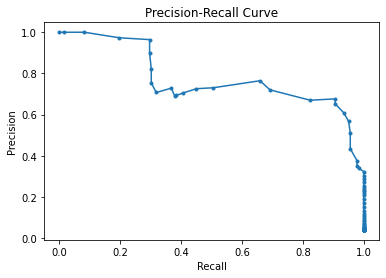

In [53]:
# Random Forest Classifier model
rfc_model_4 = training_process(RandomForestClassifier(), X_scaled_featured, y, start_index, stop_index)

### 2.4.3 Gradient Boosting Classifier

Train: 1
PR-AUC: 0.4510558514308908
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1978
           1       0.33      0.16      0.21       578

    accuracy                           0.74      2556
   macro avg       0.56      0.53      0.53      2556
weighted avg       0.68      0.74      0.70      2556

Train: 2
PR-AUC: 0.03934290335100734
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      4432
           1       0.00      0.00      0.00       182

    accuracy                           0.75      4614
   macro avg       0.48      0.39      0.43      4614
weighted avg       0.91      0.75      0.82      4614



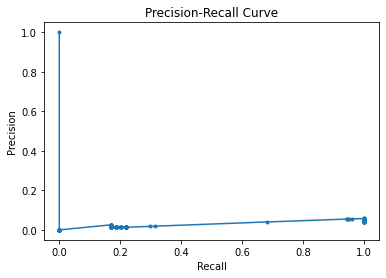

In [54]:
# Gradient Boosting Clasifier
gbc_model_4 = GradientBoostingClassifier()
gbc_model_4 = training_process(gbc_model, X_scaled_featured, y, start_index, stop_index)

### 2.4.4 LSTM

Train 1: 
[   0    1    2 ... 1644 1645 1646]
[1647 1648 1649 ... 3290 3291 3292]
PR-AUC: 0.7388059043618977
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1371
           1       0.00      0.00      0.00       275

    accuracy                           0.83      1646
   macro avg       0.42      0.50      0.45      1646
weighted avg       0.69      0.83      0.76      1646

Train 2: 
[   0    1    2 ... 3290 3291 3292]
[3293 3294 3295 ... 4936 4937 4938]
Train 3: 
[   0    1    2 ... 4936 4937 4938]
[4939 4940 4941 ... 6582 6583 6584]
PR-AUC: 0.5290387168517765
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1068
           1       0.50      0.01      0.01       578

    accuracy                           0.65      1646
   macro avg       0.57      0.50      0.40      1646
weighted avg       0.60      0.65      0.51      1646

Train 4: 
[   0    1    2 ... 6582 6583 6584]


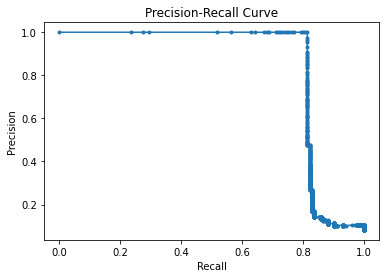

In [168]:
lstm_model_Adam = training_lstm_model(X_scaled_featured, y, Adam(), n_splits = 6)

Train 1: 
[   0    1    2 ... 1644 1645 1646]
[1647 1648 1649 ... 3290 3291 3292]
PR-AUC: 0.6651603205549382
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1371
           1       0.00      0.00      0.00       275

    accuracy                           0.83      1646
   macro avg       0.42      0.50      0.45      1646
weighted avg       0.69      0.83      0.76      1646

Train 2: 
[   0    1    2 ... 3290 3291 3292]
[3293 3294 3295 ... 4936 4937 4938]
Train 3: 
[   0    1    2 ... 4936 4937 4938]
[4939 4940 4941 ... 6582 6583 6584]
PR-AUC: 0.9631433500352179
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1068
           1       0.00      0.00      0.00       578

    accuracy                           0.65      1646
   macro avg       0.32      0.50      0.39      1646
weighted avg       0.42      0.65      0.51      1646

Train 4: 
[   0    1    2 ... 6582 6583 6584]


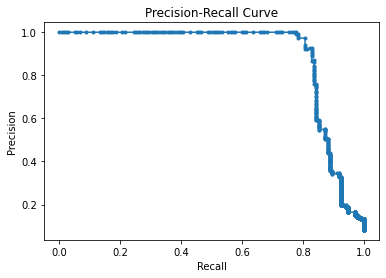

In [169]:
lstm_model_SGD = training_lstm_model(X_scaled_featured, y, SGD(), n_splits = 6)

Train 1: 
[   0    1    2 ... 1644 1645 1646]
[1647 1648 1649 ... 3290 3291 3292]
PR-AUC: 0.7649924223633895
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1371
           1       0.00      0.00      0.00       275

    accuracy                           0.83      1646
   macro avg       0.42      0.50      0.45      1646
weighted avg       0.69      0.83      0.76      1646

Train 2: 
[   0    1    2 ... 3290 3291 3292]
[3293 3294 3295 ... 4936 4937 4938]
Train 3: 
[   0    1    2 ... 4936 4937 4938]
[4939 4940 4941 ... 6582 6583 6584]
PR-AUC: 0.606416355734136
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1068
           1       0.50      0.01      0.01       578

    accuracy                           0.65      1646
   macro avg       0.57      0.50      0.40      1646
weighted avg       0.60      0.65      0.51      1646

Train 4: 
[   0    1    2 ... 6582 6583 6584]
[

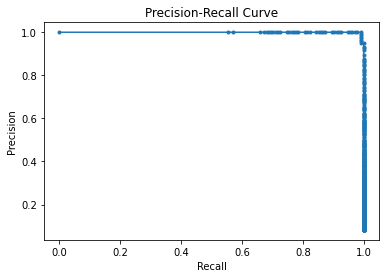

In [170]:
lstm_model_RMSprop = training_lstm_model(X_scaled_featured, y, RMSprop(), n_splits = 6)

## 2.5 Hyperparameter tuning

### 2.5.1 Logistic Regression

In [40]:
# Define a function that take a model and timeframe to apply the training process
def training_process_hyperparams(grid_search,X, y, start_index, stop_index):
    print("bro I AM WORKING DO NOT SHUT ME DOWN")
    num_split = len(start_index)
    
    for i in range(num_split - 1):
        X_train, X_test = X.loc[start_index[0]:stop_index[i], :], X.loc[start_index[i+1]:stop_index[i+1], :]
        y_train, y_test = y.loc[start_index[0]:stop_index[i]], y.loc[start_index[i+1]:stop_index[i+1]]

        grid_search.fit(X_train, y_train)

    
    best_model = grid_search.best_estimator_
    
    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    print("PR-AUC:", average_precision_score(y_test, y_pred_proba))
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Best Hyperparameters:", grid_search.best_params_)
    plot_pr_curve(y_test, y_pred_proba)
    
    return best_model

bro I AM WORKING DO NOT SHUT ME DOWN
PR-AUC: 0.6673431892516889
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      4432
           1       0.11      1.00      0.20       182

    accuracy                           0.69      4614
   macro avg       0.56      0.84      0.50      4614
weighted avg       0.96      0.69      0.78      4614

Best Hyperparameters: {'C': 0.009, 'class_weight': {0: 1, 1: 9}, 'max_iter': 7000, 'solver': 'liblinear'}


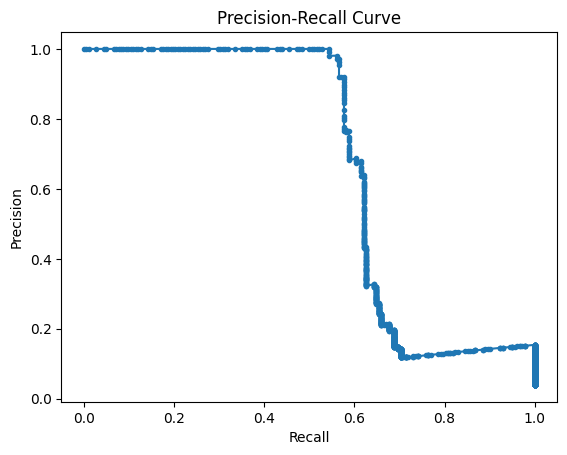

In [43]:
# define tuning hyperparameter for LR
lr5 = LogisticRegression()

lr_hyperparams = {
    'class_weight' : [None, {0:1, 1:3}, {0:1, 1:7}, {0:1, 1:9}],
    'C' : [0.001, 0.003, 0.007, 0.009, 0.01],
    'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [7000, 10000]
}

lr_search = GridSearchCV(lr5, lr_hyperparams, cv = 5, scoring = 'recall')

lr_search = training_process_hyperparams(lr_search ,X_scaled_featured, y, start_index, stop_index)

### 2.5.2 Random Forest Classifier

bro I AM WORKING DO NOT SHUT ME DOWN
PR-AUC: 0.8656540088266116
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4432
           1       0.43      1.00      0.60       182

    accuracy                           0.95      4614
   macro avg       0.71      0.97      0.78      4614
weighted avg       0.98      0.95      0.96      4614

Best Hyperparameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 75}


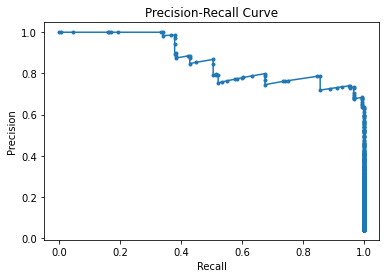

In [63]:
# Define Tuning Hyperparameter for GFC
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
rfc5 = RandomForestClassifier()

rfc_hyperparams = {
    'n_estimators' : [50, 75, 100],
    'max_depth': [None, 15, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5]
}

rfc_search = GridSearchCV(gfc5, gfc_hyperparams, cv = 5, scoring = 'recall')

rfc_search = training_process_hyperparams(gfc_search , X_scaled_featured, y, start_index, stop_index)

### 2.5.3 XGBoost

In [ ]:
# Define tuning hyperparams for XGBoost    
gbc5 = GradientBoostingClassifier()

gbc_hyperparams = {
    'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1],
    'max_depth': [None, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators' : [50, 75, 100, 200, 400],
    'max_features': ['sqrt', 'log2', 0.5] 
}

gbc_search = GridSearchCV(gbc5, gbc_hyperparams, cv = 5, scoring = 'recall')

gbc_search = training_process_hyperparams(gbc_search , X_scaled_featured, y, start_index, stop_index)

bro I AM WORKING DO NOT SHUT ME DOWN


### 2.5.4 LSTM

In [54]:
df.head()

,Interest Rate,GDP Growth Rate,sp500_Open,sp500_High,sp500_Low,sp500_Close,sp500_Adj Close,sp500_Volume,Inflation Index,Unemployment Rate,Consumer Sentiment,VIX Open,VIX High,VIX Low,VIX Close,VIX Adj Close,VIX Volume
Date,,,,,,,,,,,,,,,,,
1993-02-01,6.46,2.3,43.96875,44.25000,43.96875,44.25000,24.783648,480500.0,143.1,7.1,86.6,12.51,12.92,12.18,12.33,12.33,0.0
1993-02-02,6.46,2.3,44.21875,44.37500,44.12500,44.34375,24.836170,201300.0,143.1,7.1,86.6,12.47,12.89,12.22,12.25,12.25,0.0
1993-02-03,6.45,2.3,44.40625,44.84375,44.37500,44.81250,25.098707,529400.0,143.1,7.1,86.6,11.98,12.34,11.79,12.12,12.12,0.0
1993-02-04,6.39,2.3,44.96875,45.09375,44.46875,45.00000,25.203711,531500.0,143.1,7.1,86.6,11.86,12.84,11.69,12.29,12.29,0.0
1993-02-05,6.32,2.3,44.96875,45.06250,44.71875,44.96875,25.186213,492100.0,143.1,7.1,86.6,12.56,13.45,12.49,12.90,12.90,0.0


# 3 Data Analysis Per Recession

In [55]:
df['sp500_Diff'] = df['sp500_High'] - df['sp500_Close']

In [105]:
def plot_graph_with_time(df, timeframe, recession_timeframe):
    # Define the columns and their original frequencies
    columns_freq = {
        'sp500_Adj Close': 'D',          # Daily
        'sp500_Volume': 'W',             # Weekly
        'sp500_Diff': 'W',               # Weekly
        'VIX Adj Close': 'D',            # Daily
        'Interest Rate': 'D',            # Daily
        'GDP Growth Rate': 'Q',          # Quarterly
        'Inflation Index': 'M',          # Monthly
        'Unemployment Rate': 'M',        # Monthly
        'Consumer Sentiment': 'M'        # Monthly
    }
    
    # Filter the DataFrame for the specified timeframe
    df_timeframe = df.loc[timeframe[0]:timeframe[1]]

    # Create a 5x2 subplot grid
    fig, axs = plt.subplots(9, 1, figsize=(15, 30))
    axs = axs.flatten()  # Flatten to make it easier to iterate

    # Loop through columns and plot each one in a separate subplot
    for i, (column, freq) in enumerate(columns_freq.items()):
        # Resample back to the original frequency for plotting
        if freq == 'M':
            data = df_timeframe[column].resample('M').mean()  # Monthly resampling
        elif freq == 'Q':
            data = df_timeframe[column].resample('Q').mean()  # Quarterly resampling
        elif freq == 'W':
            data = df_timeframe[column].resample('W').mean()  # Weekly resampling    
        else:
            data = df_timeframe[column]  # Keep daily data as is

        axs[i].plot(data.index, data, label=column)
        axs[i].set_title(column)  # Set title for each subplot
        
        # Highlight the timeframe on each graph
        axs[i].axvspan(recession_timeframe[0], recession_timeframe[1], color='yellow', alpha=0.3, label='Recession')
        
        # Format the x-axis and y-axis
        axs[i].legend()
        axs[i].set_xlabel("Date")
        axs[i].set_ylabel(column)  # Set y-axis label to the column name
    
    plt.tight_layout()
    plt.show()


## 3.1 Dot Com Recession (2001)

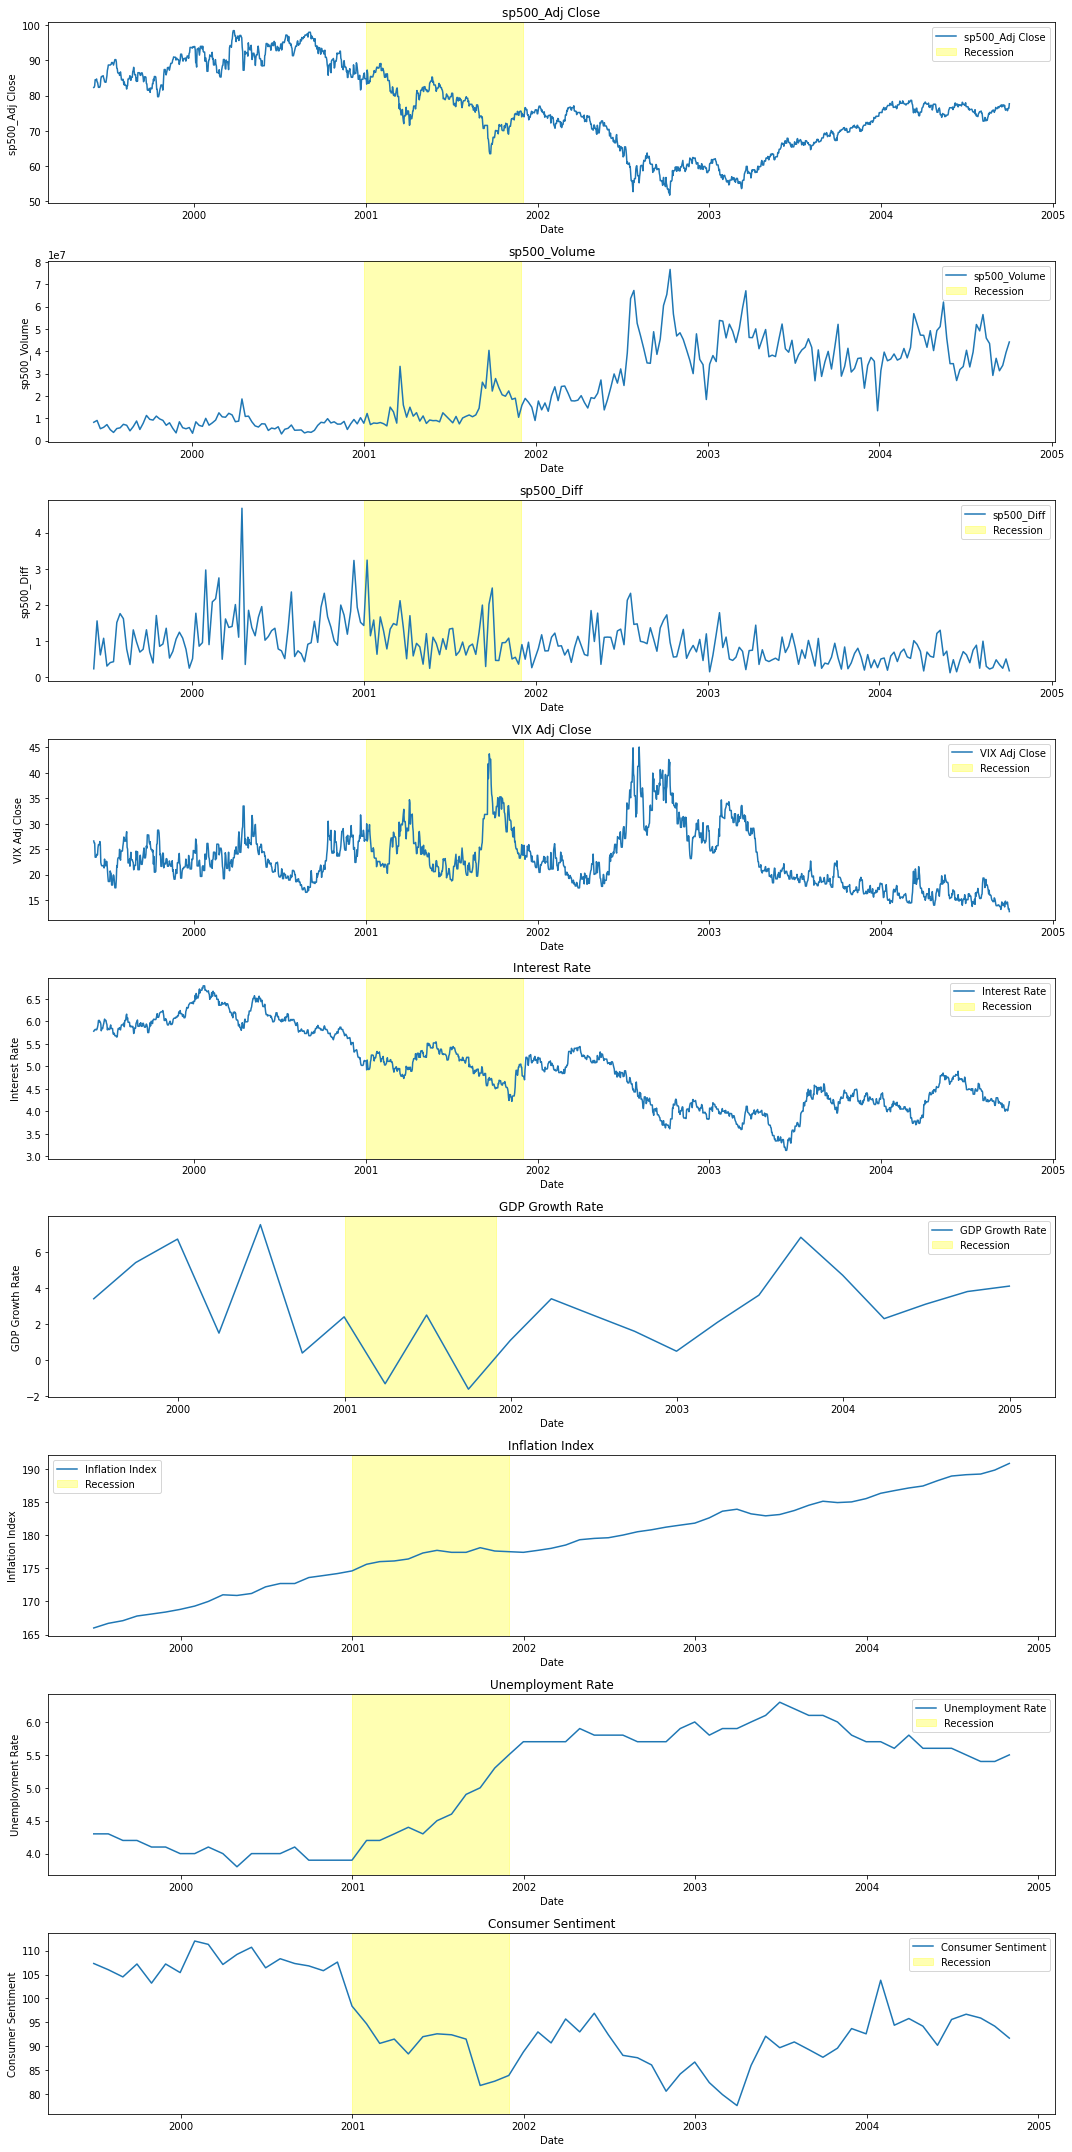

In [106]:
plot_graph_with_time(df, [pd.to_datetime('06-01-1999'),pd.to_datetime('10-01-2004')], 
                     [pd.to_datetime('01-01-2001'),pd.to_datetime('11-30-2001')])

**SP500 and VIX**: 
- Even before the recession officially started, we can see that the decreasing trend started to build up since middle of 2000. Suggested by Langdon, McMenamin, Krolik, such downtrend matches service-producing sector downtrend, which led to the 2001 recession. The daily price difference within a day also builds up during mid 2006. 
- During the recession, we can see that these trends became more clear, regarding to an increase in flucutation of price diffrence, trading volume and close price.
- Post-recession, not until mid 2003 did we achieve a more stable market and positive changes. From early 2002 to 2003, the effect of the economy recession worsen. VIX shows an even worse trend than the recession period.

**Interest rate**
- Before the recession happen, interest rate was pretty high forecasting a positive market. In mid 2000 the interest starts a dropping trend.
- During the recession, the fluctuation were still stable, with margin of change being less than 1%, even lower than the pre-recesssion process.
- Post recession, within the 1-year span of 2002, the downtrend was much worse. This may be the government's effort in order to boost the economy, which lead to a recovery at the end of 2003/early 2004.

**GDP Growth Rate**
- Before the recession, growth rate fluctuated in 2000. Greatest decrease was around 7%
- During the recession, it is clear that the recession is asscoiate with a negative growth rate.
- Post-recssion, the positive growth rate indicated that the US had stepped ot of the recession period.

**Unemployment Rate**
- There was not a clear indicator to help forecast the unemployment. However, also according to Langdon, McMenamin, Krolik, "in a short 10-month span—between March 10, 2000 and the end of 2000—the NASDAQ plunged more than 50 percent" to finance the Internet startups.
- During we can see a steep increase in Unemployment rate. The hype of Internet investment became "symptomatic of broader economic ills, which hurt the overall securities industry’s revenues." In the personnel supply services, 556,000 jobs got their payroll cuts; employment in security and commodity brokerages shrank by 23,000.
- Post recession, the rate of unemployment started to slow down, yet still gradually increases until mid 2003 when there were some possitive decreasing trend.

**Consumer Sentiment**: Sharp decrease during the recession and only recover post recession in mid 2003.


It seems like this recession has shown some forecastable signs during the mid of 2000 and achieved a recovery during mid of 2003, given the patterns of changes.

https://www.bls.gov/opub/mlr/2002/02/art1full.pdf

## 3.2 The Great Recession (2007-2009)

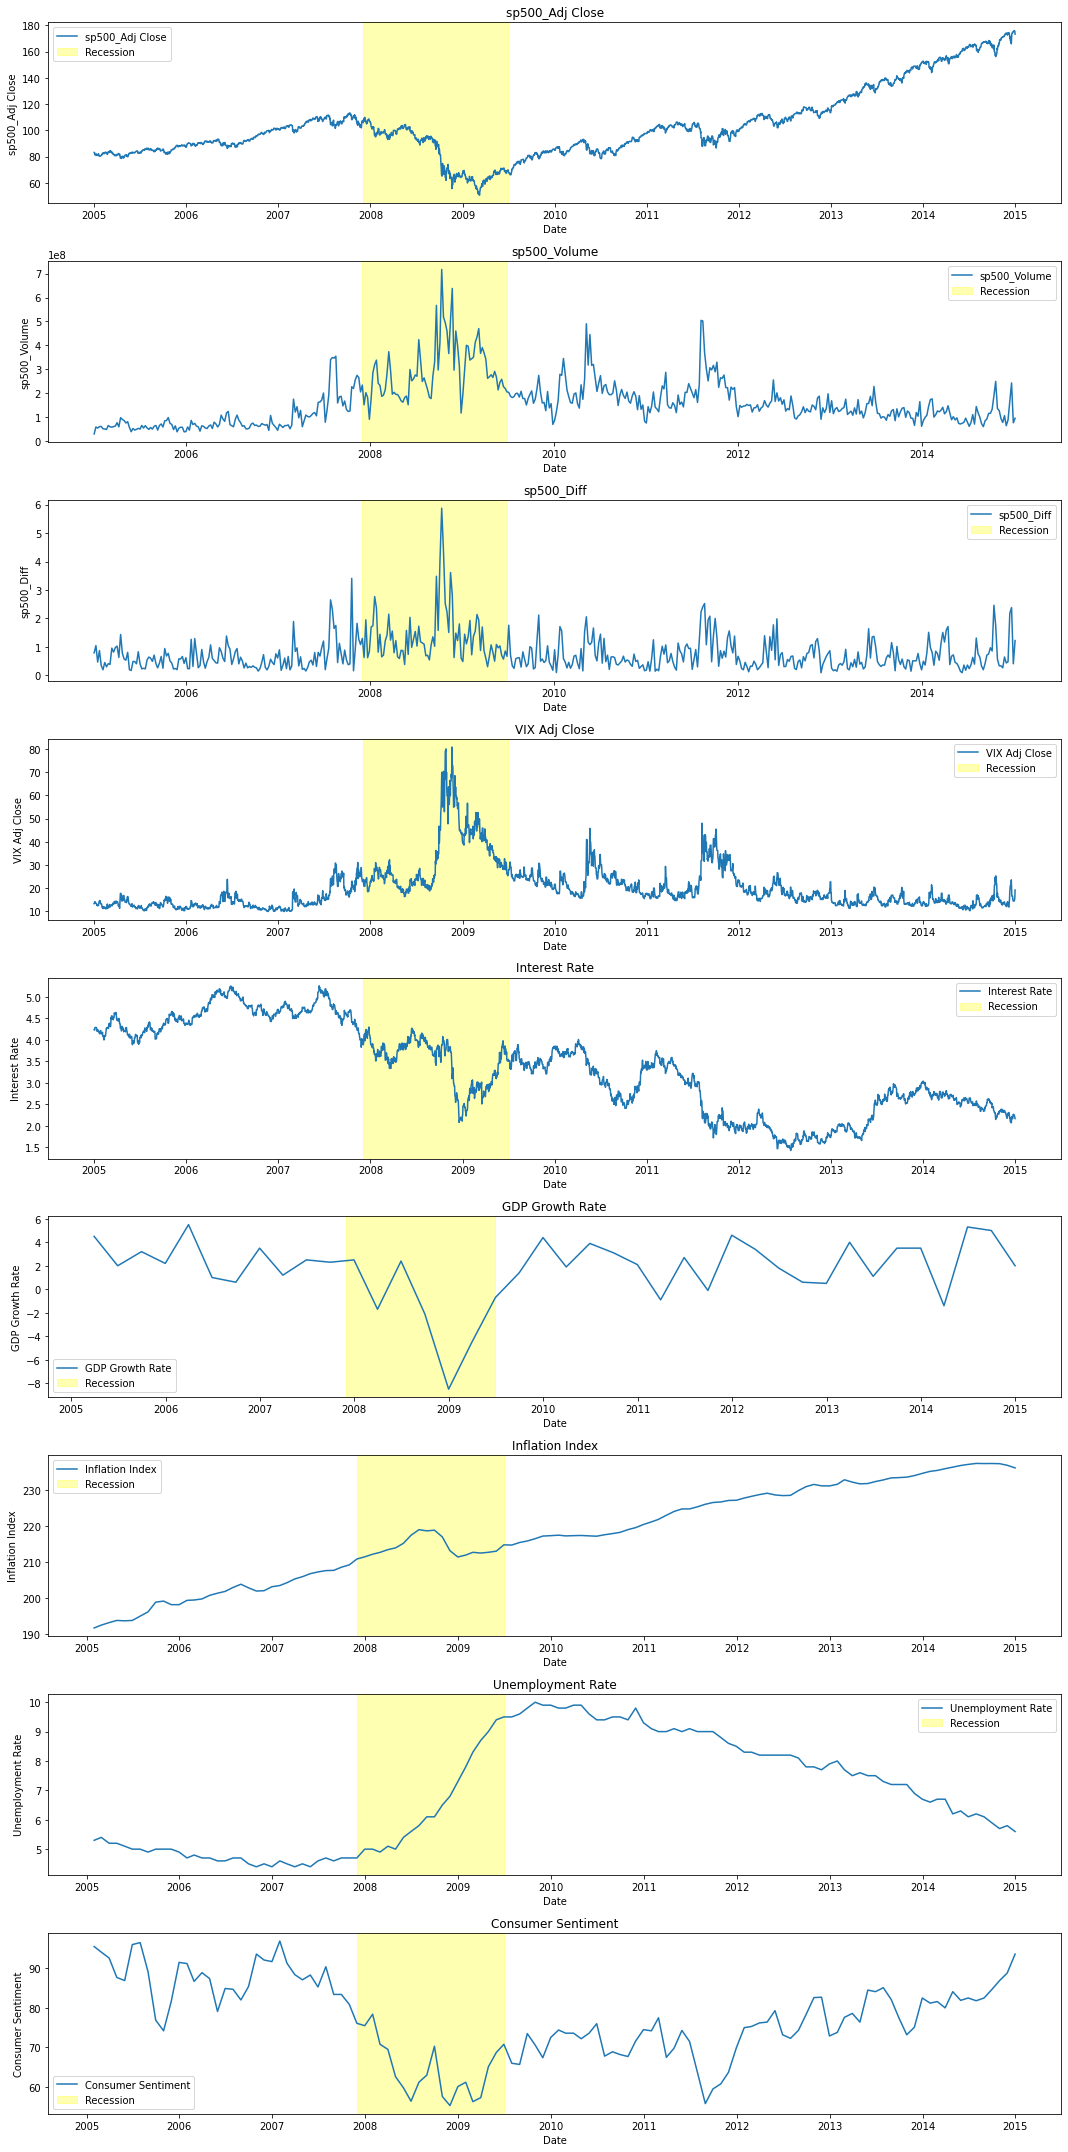

In [110]:
plot_graph_with_time(df, [pd.to_datetime('01-01-2005'),pd.to_datetime('12-31-2014')], 
                     [pd.to_datetime('12-01-2007'),pd.to_datetime('06-30-2009')])

**SP500 and VIX**: 
- Before the recession, the price of S&P 500, trading volume, and price fluctuation built up faster since the middle of 2006. VIX showed some signs of increasing but not clear until beginning of 2007.
- During the recession, the peaks of all trends were during the middle of 2008. Several reasons were prompted to explain this. Firstly, Lehman Brothers declaring bankcruptcy triggered panic throughout US and global financial market (p.27). Secondly, the securitization system that generated mortgage-backed securities (MBS) from mortgages become opage and unclear. Two major financial institution, Fannie Mae and Freddie Mac, made loan to a lot of low-credit applicant. Together, they held 1.5 trillions dollars in bonds and thousands of billion dollars in issued MBS. These explain the sharp increase in VIX, and drop in S&P 500 performance.
- Post-recession, both S&P 500 and VIX performance suggested that the financial market only recovers in early of 2012, where the fluctuation became more stable.

**Interest rate**
- Before the recession, the interest rate was pretty stable and only showed some suspicious sign toward the end of 2007. It seems like the financial market was confident in that current gwrowing state of the market (p.5).
- During the recession, the interest rate started to drop fast. The previous period with high interest rate finally came back in this period, especially in the housing market as families could not keep up with the payment of their mortgage (p.6). Interest rate drops indicated the pessimistic view of the financial market
- Post recession, the intrest rate started out stable and becamme lower over the year until mid 2013. Intersest rate increase in mid 2013, indicated the market somewhat recovered.

**GDP Growth Rate and Inflation Index**
- Before the recession, both had very expectable and stable pattern.
- During the recession, sharp decrease peaked in early 2009. This reflected the effect of the above crisis.
- Right after the recession, both seems to become fairly stable.

**Unemployment Rate**
- Before the recession, the unemployment rate was on the way to decrease and showed no sign of the market recession. This shows how great the expectation of the market performance during that time.
- During the recession, we can see a steep increase, almost doubled just in the span of two years. According to the BLS, "in late 2009, more than 15 million people were unemployed. Total employment, as measured by the Current Population Survey (CPS),2 dropped by 8.6 million, or almost 6 percent."
- Post recession, the unemployment stayed relatively high showing the market inability to adjust. Only until 2011 did the trend cool down.

**Consumer Sentiment**: Drop dramatically during the recession and only became more stable toward the end of 2014.


This recession was more visible in the financial market, and showed some sign during mid-2006. Even though it was announced to end in mid-2009, the recovery seems to take until 2014, 5 years laters.

https://www.bls.gov/opub/mlr/2018/article/great-recession-great-recovery.htm#:~:text=In%20a%202%2Dyear%20span,million%2C%20or%20almost%206%20percent.
https://www.fdic.gov/bank/historical/crisis/chap1.pdf

## 3.3 COVID-19 Recession (2020)

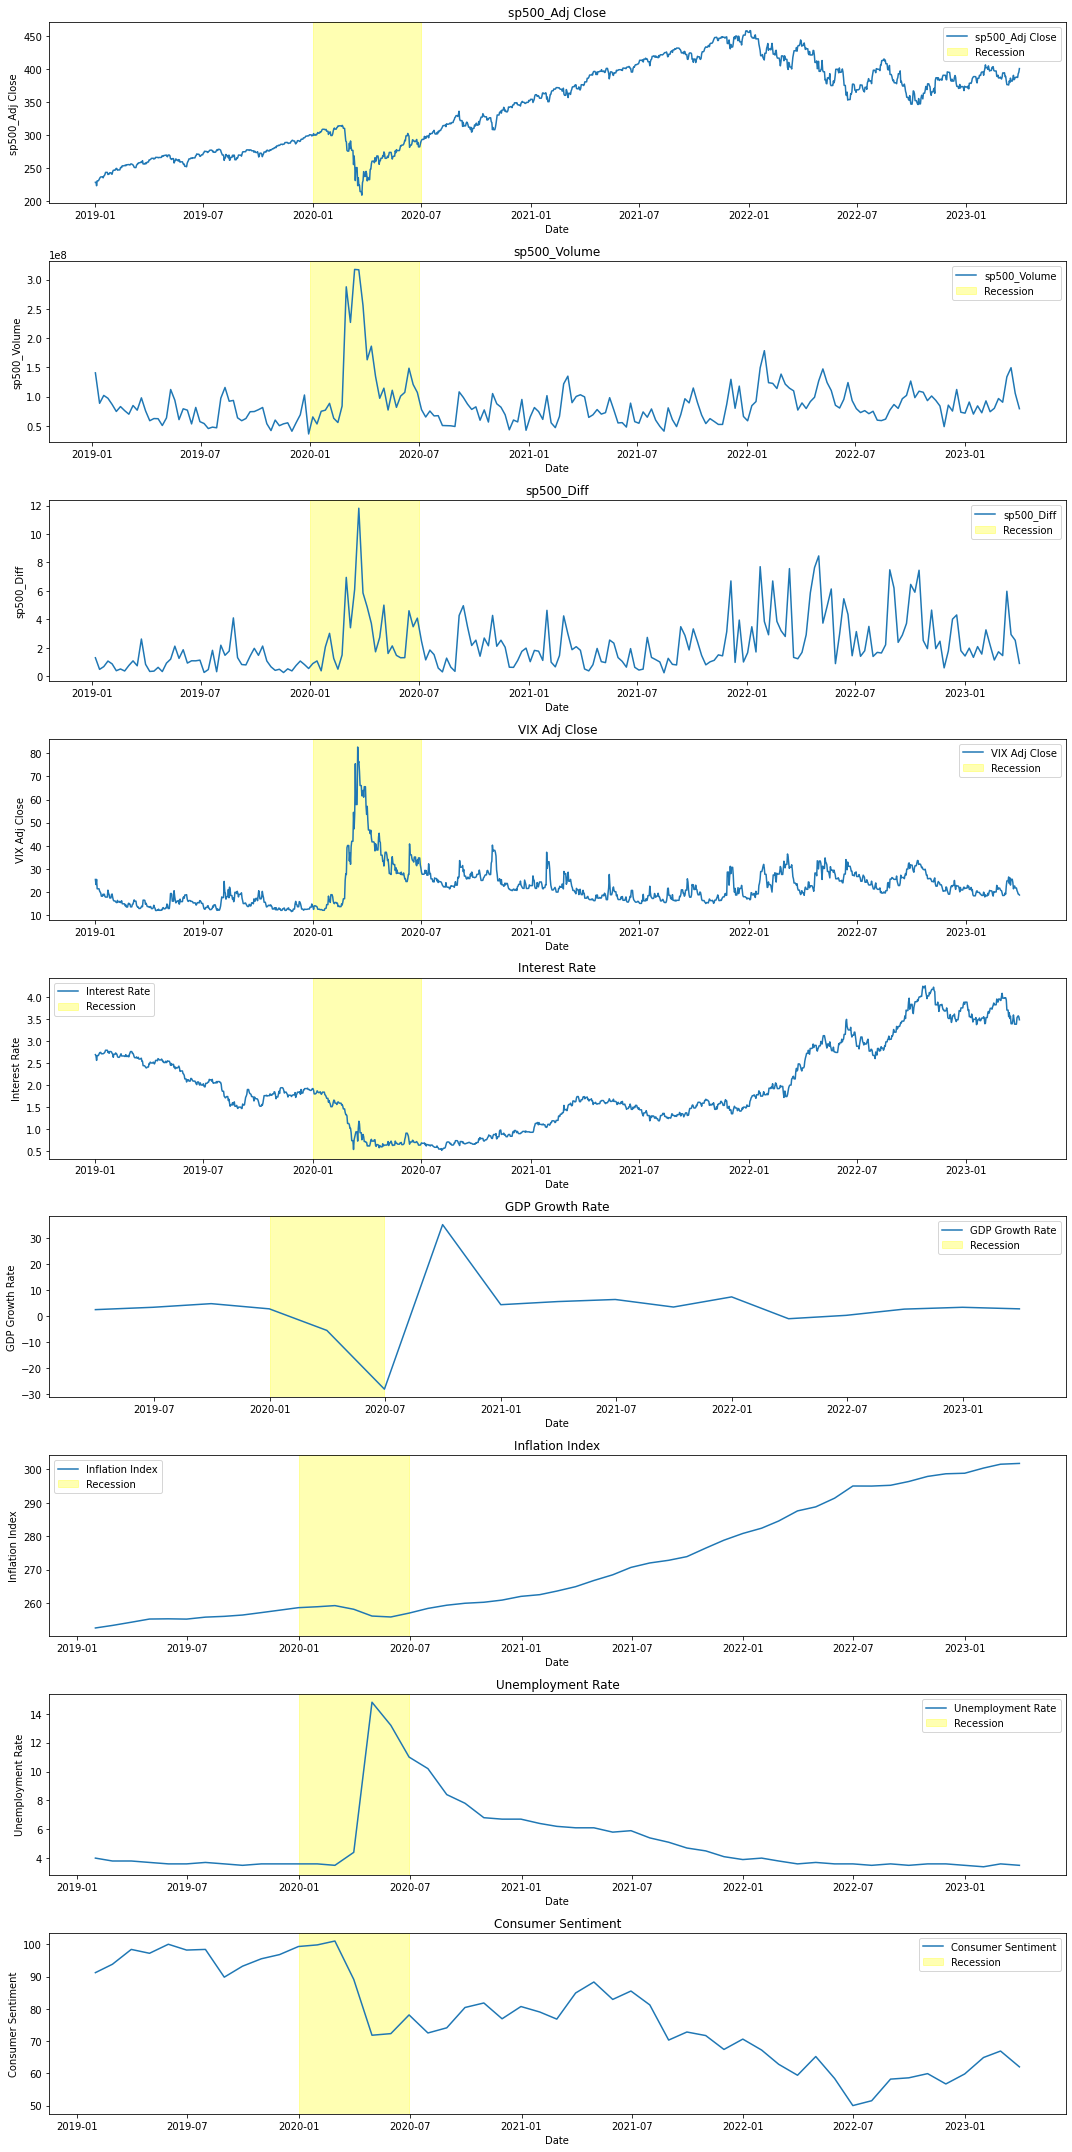

In [108]:
plot_graph_with_time(df, [pd.to_datetime('01-01-2019'),pd.to_datetime('03-31-2023')], 
                     [pd.to_datetime('01-01-2020'),pd.to_datetime('06-30-2020')])

**S&P 500 and VIX**:

- During the 2020 recession triggered by the COVID-19 pandemic, the S&P 500 experienced a rapid, steep decline in early March, while the VIX spiked to record levels as investor uncertainty surged. The pandemic brought unprecedented economic shutdowns and disruptions across industries, leading to massive sell-offs. 
- Post-recession, thanks to the Federal Reserve's swift response with aggressive monetary easing, coupled with government stimulus packages, helped stabilize the market, leading to a sharp recovery by late 2020.

**Interest Rate**:

- During the recession, interest rates fell to near-zero levels in 2020 as the Federal Reserve moved quickly to counter the economic impact of the pandemic. This drastic drop reflected the Fed’s attempt to stimulate borrowing and spending, providing liquidity to the economy. 
- Post-recession, rates remained low post-recession, with gradual rate increases.

**GDP Growth Rate and Inflation Index**:

- During the recession, the GDP growth rate saw one of its sharpest contractions in modern history during Q2 2020, as lockdowns and restrictions heavily curtailed economic activity.
- Post-recession, both GDP growth and inflation showed signs of recovery by late 2020. However, it seems like the inflation grows quite fast ever since.

**Unemployment Rate**:

- During the recession, unemployment skyrocketed in early 2020, reaching levels unseen since the Great Depression, with over 20 million jobs lost within weeks. 
- Post-recession, the rate declined as the economy began to reopen and government support programs were implemented, but it remained elevated into early 2021.

**Consumer Sentiment**: Consumer sentiment plunged during the early months of the pandemic due to widespread uncertainty, job losses, and health concerns. Sentiment improved gradually as government support programs took effect and vaccine rollouts began, with more stability returning by late 2021.


This recession was definitely unexpectable, given how normal the market was before the recession. It was the shortest recession in the US history, so the market quickly came back to normal at the end of the same year.

https://www.weforum.org/agenda/2020/08/how-does-the-covid-recession-compare/